In [1]:
import time
import numpy as np
from keras.datasets import cifar10
from keras.datasets import mnist
from sklearn.datasets import make_blobs
from pandas import DataFrame #graficar
import matplotlib.pyplot as plt
#using tensorflow backend

Using TensorFlow backend.


In [2]:
#idem class kNeasrestNeighbour un poco modificada del anterior
class kNearestNeighbour:
    
    def __init__(self,ka=1):
        self.X = None
        self.Y = None
        self.k = ka
        
    def train(self,X,Y):
        self.X = X
        self.Y = Y
        
    def decide(self,idmins):
        opc = self.Y[idmins]
        u, c = np.unique(opc, return_counts=True)
        opccount = np.asarray((u, c))
        na = np.argmax(opccount[1,:])
        return opccount[0,na]
    
    def predict(self,X):
        assert self.X is not None, 'Train method need to be called first'
        Yp = np.zeros(X.shape[0])
        for idx in range(X.shape[0]): #para cada imagen que le pase
            norm = np.linalg.norm(self.X - X[idx],axis=-1) #calculo norma l2
            idmins = np.argpartition(norm,self.k) #selecciona las k mas cercanas
            classidmin = self.decide(idmins[:self.k]) #encuentro categoria mas frecuente
            Yp[idx] = classidmin
        return Yp

In [14]:
#pruebo usar sklearn para crear los datos
x1, y1 = make_blobs(n_samples=60000, centers=5, n_features=2)
#n samples numero total de datos
#centers cant de conjuntos (5 en este caso)
#n features dimension(2 in this case)
#defino los training y testing data
x_train = x1[:50000]
y_train = y1[:50000]
x_test = x1[50000:]
y_test = y1[50000:]

In [21]:
model = kNearestNeighbour(7)
model.train(x_train,y_train)

In [22]:
start_time = time.time()
yp = model.predict(x_test) #testeo con 10000
yp = yp.flatten()
print("porcentaje:",np.mean(yp==y_test)*100,"%")
end_time = time.time()
print("tiempo",end_time - start_time)

porcentaje: 97.64 %
tiempo 38.39616274833679


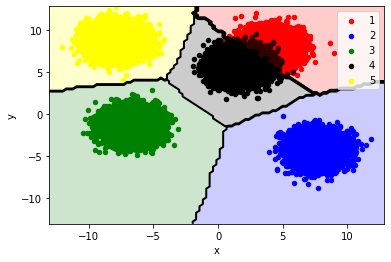

In [23]:
#dibujo los training data con scatter con distintos colores
df = DataFrame(dict(x=x_train[:,0], y=x_train[:,1], label=y_train))
colors = {0:'red', 1:'blue', 2:'green',3:'black',4:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key+1, color=colors[key])
#dibujo ahora entonces las fronteras de decision
steps = 100
xmin,xmax = x_train[:,0].min() - 1, x_train[:,0].max() + 1
ymin, ymax = x_train[:,1].min() - 1, x_train[:,1].max() + 1
x_span = np.linspace(xmin,xmax,steps)
y_span = np.linspace(xmin,xmax,steps)
xx,yy = np.meshgrid(x_span,y_span)
labels = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = labels.reshape(xx.shape)
plt.contourf(xx,yy,z,5,colors=['red', 'blue', 'green','black','yellow'],alpha=0.2)
plt.contour(xx,yy,z,5,colors='black',linewidths=2)
plt.savefig('ej4k7.pdf')